<a href="https://colab.research.google.com/github/shiv03-tan/-datasciencecoursera/blob/main/RBF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install matplotlib-venn

In [12]:
!apt-get -qq install -y libfluidsynth1

In [13]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

In [14]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [15]:
!pip install cartopy
import cartopy

In [16]:
from __future__ import print_function
from sklearn.gaussian_process.kernels import PairwiseKernel
import keras

In [19]:
#from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.gaussian_process import GaussianProcessRegressor
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [20]:

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [21]:
#                         PREPROCESSING DATA

# Change from matrix to array --> dimension 28x28 to array of dimention 784
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [22]:
# Change to float datatype
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Scale the data to lie between 0 to 1
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


60000 train samples
10000 test samples


In [26]:

# convert class vectors to binary class matrices (one hot encoding)
import tensorflow as tf
from keras import utils as np_utils 

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [28]:

#                       KMEANS to find centers
size = 40
kmeans_model = KMeans(size)   #find 10 centers with kmeans on training samples
kmeans_model.fit(x_train)
centers = kmeans_model.cluster_centers_
x = kmeans_model.predict(kmeans_model.cluster_centers_)
x = tf.keras.utils.to_categorical(x, size)


In [30]:
y_trainn= kmeans_model.predict(x_train)
y_trainn=tf.keras.utils.to_categorical(y_trainn, size)
y_testt=kmeans_model.predict(x_test)
y_testt=tf.keras.utils.to_categorical(y_testt, size)

In [31]:

#                       RBF LAYER

kernel = PairwiseKernel(metric='polynomial')   #GPR uses the kernel to define the covariance of the training sample
rbf_model = GaussianProcessRegressor(kernel=kernel).fit(centers, x)

temp1 = rbf_model.predict(x_train)
temp2 = rbf_model.predict(x_test)

In [34]:
#                 PERCEPTRONS LAYERS
batch_size = 128
epochs = 10
img_size = 28 * 28

model = Sequential()
model.add(Dense(img_size, activation='relu', input_shape=(size,)))
model.add(Dropout(0.2))
model.add(Dense(size, activation='softmax'))

model.summary()
nadam=tf.keras.optimizers.Nadam(lr=0.0005)
model.compile(loss='categorical_crossentropy',
              optimizer=nadam,
              metrics=['accuracy'])

#                      TRAINING THE MODEL
history = model.fit(temp1, y_trainn,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(temp2, y_testt))

#                      EVALUATE TRAINED MODEL
score = model.evaluate(temp2, y_testt, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 784)               32144     
_________________________________________________________________
dropout_1 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 40)                31400     
Total params: 63,544
Trainable params: 63,544
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
469/469 [==============================] - 5s 7ms/step - loss: 1.3786 - accuracy: 0.8131 - val_loss: 0.4685 - val_accuracy: 0.8955
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3643 - accuracy: 0.9122 - val_loss: 0.2924 - val_accuracy: 0.9188
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2538 - accuracy: 0.9301 - val_loss: 0.2301 - val_accuracy: 0.9331
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2053 - accuracy: 0.9407 - val_loss: 0.1982 - val_accuracy: 0.9411
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1774 - accuracy: 0.9461 - val_loss: 0.1756 - val_accuracy: 0.9459
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1573 - accuracy: 0.9512 - val_loss: 0.1597 - val_accuracy: 0.9486
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1431 - accuracy: 0.9551 - val_loss: 0.1498 - val_accuracy: 0.9526
Epoch 

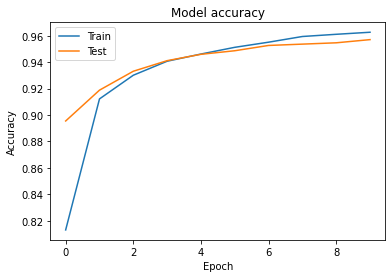

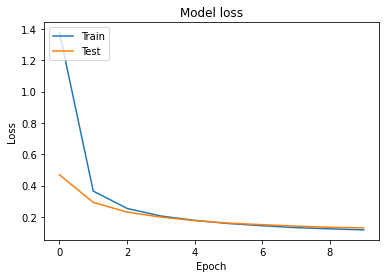

In [36]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

(40, 784)
(784,)
(784, 40)
(40,)


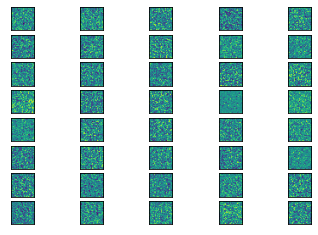

In [37]:
for i in range(len(model.get_weights())):
  print(model.get_weights()[i].shape)
weights = model.get_weights()[0]
for i in range(len(weights)):
  ax = plt.subplot(len(weights)/5, 5, i + 1)
  plt.imshow(weights[i].reshape(28, 28))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: scipy.dot is deprecated and will be removed in SciPy 2.0.0, use numpy.dot instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: DeprecationWarning: scipy.dot is deprecated and will be removed in SciPy 2.0.0, use numpy.dot instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zero

center [array([-0.73737374]), array([-0.35353535]), array([-0.77777778]), array([-0.23232323]), array([-0.51515152]), array([-0.81818182]), array([0.71717172]), array([0.77777778]), array([0.01010101]), array([0.83838384])]
[[5.75923505e-01 3.53190672e-02 6.73638455e-01 8.96326288e-03
  1.52494854e-01 7.67618196e-01 5.69168520e-11 1.04548972e-11
  2.85167907e-04 1.81082043e-12]
 [6.24904709e-01 4.33851086e-02 7.21446326e-01 1.14502011e-02
  1.77786712e-01 8.11429096e-01 9.88271037e-11 1.85123998e-11
  3.93984070e-04 3.26983696e-12]
 [6.73638455e-01 5.29463752e-02 7.67618196e-01 1.45319594e-02
  2.05924246e-01 8.52157700e-01 1.70480749e-10 3.25664002e-11
  5.40780169e-04 5.86598424e-12]
 [7.21446326e-01 6.41942099e-02 8.11429096e-01 1.83231154e-02
  2.36962572e-01 8.89105812e-01 2.92172073e-10 5.69168520e-11
  7.37440410e-04 1.04548972e-11]
 [7.67618196e-01 7.73249349e-02 8.52157700e-01 2.29529515e-02
  2.70904428e-01 9.21618123e-01 4.97469134e-10 9.88271037e-11
  9.99072922e-04 1.85123

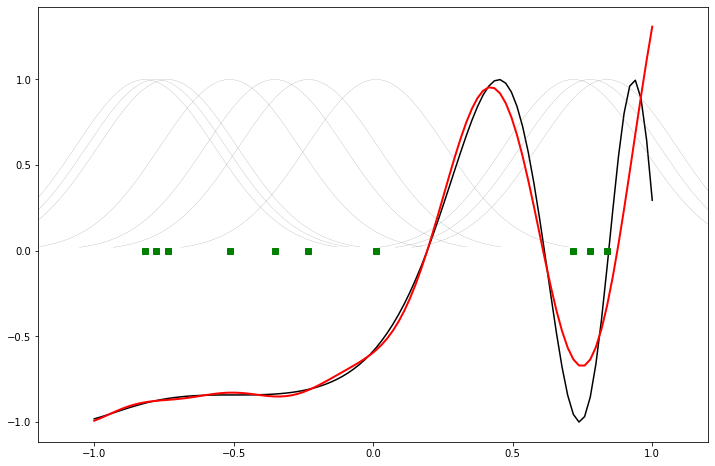

In [38]:
from scipy import *
from scipy.linalg import norm, pinv
 
from matplotlib import pyplot as plt
 
class RBF:
     
    def __init__(self, indim, numCenters, outdim):
        self.indim = indim
        self.outdim = outdim
        self.numCenters = numCenters
        self.centers = [random.uniform(-1, 1, indim) for i in range(numCenters)]
        self.beta = 8
        self.W = random.random((self.numCenters, self.outdim))
         
    def _basisfunc(self, c, d):
        assert len(d) == self.indim
        return exp(-self.beta * norm(c-d)**2)
     
    def _calcAct(self, X):
        # calculate activations of RBFs
        G = zeros((X.shape[0], self.numCenters), float)
        for ci, c in enumerate(self.centers):
            for xi, x in enumerate(X):
                G[xi,ci] = self._basisfunc(c, x)
        return G
     
    def train(self, X, Y):
        """ X: matrix of dimensions n x indim 
            y: column vector of dimension n x 1 """
         
        # choose random center vectors from training set
        rnd_idx = random.permutation(X.shape[0])[:self.numCenters]
        self.centers = [X[i,:] for i in rnd_idx]
         
        print("center", self.centers)
        # calculate activations of RBFs
        G = self._calcAct(X)
        print(G)
         
        # calculate output weights (pseudoinverse)
        self.W = dot(pinv(G), Y)
         
    def test(self, X):
        """ X: matrix of dimensions n x indim """
         
        G = self._calcAct(X)
        Y = dot(G, self.W)
        return Y
 
      
if __name__ == '__main__':
    # ----- 1D Example ------------------------------------------------
    n = 100
     
    x = mgrid[-1:1:complex(0,n)].reshape(n, 1)
    # set y and add random noise
    y = sin(3*(x+0.5)**3 - 1)
    # y += random.normal(0, 0.1, y.shape)
     
    # rbf regression
    rbf = RBF(1, 10, 1)
    rbf.train(x, y)
    z = rbf.test(x)
       
    # plot original data
    plt.figure(figsize=(12, 8))
    plt.plot(x, y, 'k-')
     
    # plot learned model
    plt.plot(x, z, 'r-', linewidth=2)
     
    # plot rbfs
    plt.plot(rbf.centers, zeros(rbf.numCenters), 'gs')
     
    for c in rbf.centers:
        # RF prediction lines
        cx = arange(c-0.7, c+0.7, 0.01)
        cy = [rbf._basisfunc(array([cx_]), array([c])) for cx_ in cx]
        plt.plot(cx, cy, '-', color='gray', linewidth=0.2)
     
    plt.xlim(-1.2, 1.2)
    plt.show()